In [4]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

from typing import List

%matplotlib inline

In [59]:
# setting a seed, to avoid any assertion-errors
np.random.seed(145)

In [5]:
num_friends = np.random.randint(low=1, high=100, size=100)
another_vec_of_numbers = np.random.randint(low=1, high=100, size=100)

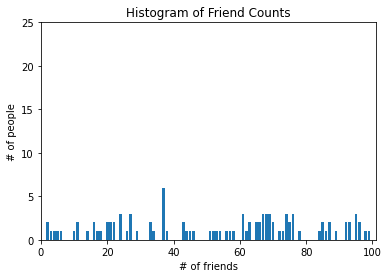

In [6]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [7]:
# some generic statistic
len(num_friends), max(num_friends), min(num_friends)

(100, 99, 2)

In [8]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]
smallest_value, second_smallest_value, second_largest_value

(2, 2, 98)

## Central Tendencies

In [9]:
def mean(xs: List[float]) -> float:
  return sum(xs)/len(xs)

In [10]:
mean(num_friends)

52.86

### Median

In [11]:
def _median_odd(xs: List[float]) -> float:
  """If len(xs) is odd, the median is the middle element"""
  return sorted(xs)[len(xs)//2]

def _median_even(xs: List[float]) -> float:
  """If len(xs) is even, the median is the average of the middle two elements."""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs)//2
  return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
  """Find the median value in a vector"""
  return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [12]:
assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 19, 2, 10]) == (2+10)/2

In [13]:
median(num_friends)

59.5

### for fast sorting - `Quickselect` algorithm can be used.

In [14]:
def quantiles(xs: List[float], p:float) -> float:
  """Returns the pth-percentile value in x"""
  p_index = int(p*len(xs))
  return sorted(xs)[p_index]

In [21]:
assert quantiles(num_friends, 0.10) == 16
assert quantiles(num_friends, 0.25) == 27
assert quantiles(num_friends, 0.75) == 74
assert quantiles(num_friends, 0.90) == 92

In [22]:
def mode(x: List[float]) -> List[float]:
  """Returns a list, since there might be more than one mode"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count==max_count]

In [26]:
assert set(mode(num_friends))=={37}

In [29]:
[x_i for x_i, count in Counter(num_friends).items() if count==6]

[37]

### Dispersion
> how much spread out the data is.

In [30]:
def data_range(xs: List[float]) -> float:
  return max(xs)-min(xs)

In [32]:
assert data_range(num_friends)== 97

**A good measure of data dispersion can be `Variance`.**

In [35]:
Vector = List[float]
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [36]:
def de_mean(xs: List[float]) -> List[float]:
  """Translate a list by subtracting its mean."""
  x_bar = mean(xs)
  return [x-x_bar for x in xs]

In [39]:
def variance(xs: List[float]) -> float:
  """Almost the average squared deviation from the mean."""
  n = len(xs)
  assert n >= 2, "length of list must be greater than 1 to compute variance."
  deviations = de_mean(xs)
  return sum_of_squares(deviations)/(n-1)

In [47]:
assert 789< variance(num_friends)< 790

**Reason behind dividing by `n-1`**
> - In a real scenario, we might have a sample from a population, `x_bar` is only an estimate of the actual mean.
- Therefore, `(x_i - x_bar)^2` is an underestimate of `x_i` squared deviation from the mean.
- Thus, we divide by `n-1` and not `n`.

In [48]:
# To make sense of variance (as it is unit squared)
import math
def standard_deviation(xs: List[float]) -> float:
  """sqrt of variance"""
  return math.sqrt(variance(xs))

In [50]:
assert 28 < standard_deviation(num_friends) < 28.5

- `standard-deviation` is also affected by the `outlier problem`.
- An alternative can be `interquartile range`

In [51]:
def interquartile_range(xs: List[float]) -> float:
  """difference b/w 75 percentile & 25 percentile."""
  return quantiles(xs, 0.75) - quantiles(xs, 0.25)

In [54]:
# not affected that much by small number of outliers.
assert interquartile_range(num_friends)==47

### Correlation & Covariance
> **Covariance :** analogous to `variance`
- `Variance` is about how a single variable deviates around the mean.
- `Covariance` is about how two variables together deviates around their means.

In [55]:
def covariance(xs: List[float], ys: List[float]) -> float:
  assert (len(xs)==len(ys)), "both vectors must be of same length."

  return dot(de_mean(xs), de_mean(ys))/(len(xs)-1)

In [60]:
assert 8.5<covariance(num_friends, another_vec_of_numbers)<9

- Covariance can be hard to interpret, and that give rise to `Correlation`.
- `Correlation` is unitless.
- Always lies b/w -1 & 1.
- Value around zero signify weak correlation (negative or positive)
- **Can be very sensitive to outliers.**

In [62]:
def correlation(xs: List[float], ys: List[float]) -> float:
  """how much two vectors vary together around their means."""

  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)

  if stdev_x > 0 and stdev_y > 0:
    return covariance(xs, ys) / stdev_x / stdev_y
  else:
    return 0 # if no std-variation, correlation is anyway zero.

In [66]:
assert 0.01<correlation(num_friends, another_vec_of_numbers)<0.012

In [83]:
outlier = num_friends.tolist().index(99)

In [84]:
num_friends_good = [x for i, x in enumerate(num_friends) if i!=outlier]
another_list_smth = [x for i, x in enumerate(another_vec_of_numbers) if i!=outlier]

In [85]:
another_good = [dm/60 for dm in another_list_smth]

In [89]:
assert -0.02<correlation(num_friends_good, another_list_smth)<0
assert -0.02<correlation(num_friends_good, another_good)<0

--------